In [9]:
import numpy as np

In [10]:
import pandas as pd

In [13]:
df = pd.read_csv("spam.csv", encoding="latin-1")

In [14]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvements acc to the Evaluation
# 7. Website
# 8. Deploy

## DATA CLEANING

In [15]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [17]:
df.shape

(5572, 5)

In [18]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [19]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [20]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [21]:
df.sample(5)

,v1,v2
796,spam,"Orange customer, you may now claim your FREE C..."
1845,ham,Hi. || Do u want | to join me with sts later? ...
3002,ham,I will see in half an hour
1746,ham,I don know account details..i will ask my mom ...
2664,ham,He remains a bro amongst bros


In [25]:
df.rename(columns={'v1':'target' , 'v2':'text'} , inplace=True)
df.sample(5)

,target,text
2224,ham,"I prefer my free days... Tues, wed, fri oso ca..."
5441,ham,"By the way, make sure u get train to worc fore..."
41,ham,"Did I forget to tell you ? I want you , I need..."
5250,spam,Urgent! Please call 09061213237 from a landlin...
2086,ham,Dude how do you like the buff wind.


In [26]:
#label Encoder

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [28]:
df['target'] = encoder.fit_transform(df['target'])
df.sample(5)

,target,text
3195,0,"I av a new number, . Wil u only use this one,ta."
344,0,My sister cleared two round in birla soft yest...
3432,0,Christmas is An occasion that is Celebrated as...
3595,0,Good morning princess! Happy New Year!
1133,0,"As I entered my cabin my PA said, '' Happy B'd..."


In [29]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [30]:
#checking for duplicate values

df.duplicated().sum()

np.int64(403)

In [31]:
df = df.drop_duplicates(keep="first")
df.shape

(5169, 2)

## EDA

In [32]:
# exploratory Data Analysis

In [34]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

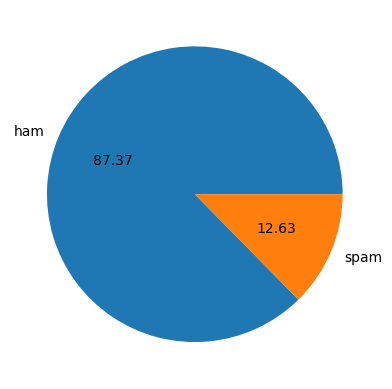

In [36]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts() ,labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [37]:
#here data is imbalanced Spam is not that much but ham is there
import nltk

In [44]:
nltk.download('punkt')
nltk.download('punkt_tab')  # needed for newer NLTK tokenizers

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kesha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\kesha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [55]:
df['num_characters'] = df['text'].apply(len)

In [56]:
df.head()

,target,text,num_char,num_words,num_sentences,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...","[Go until jurong point, crazy.., Available onl...",111
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]","[Ok lar..., Joking wif u oni...]",29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",[Free entry in 2 a wkly comp to win FA Cup fin...,155
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",[U dun say so early hor... U c already then sa...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...","[Nah I don't think he goes to usf, he lives ar...",61


In [57]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [58]:
df.head()

,target,text,num_char,num_words,num_sentences,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111,24,"[Go until jurong point, crazy.., Available onl...",111
1,0,Ok lar... Joking wif u oni...,29,8,"[Ok lar..., Joking wif u oni...]",29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,[Free entry in 2 a wkly comp to win FA Cup fin...,155
3,0,U dun say so early hor... U c already then say...,49,13,[U dun say so early hor... U c already then sa...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,"[Nah I don't think he goes to usf, he lives ar...",61


In [59]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [52]:
df.head()

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...","[Go until jurong point, crazy.., Available onl..."
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]","[Ok lar..., Joking wif u oni...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",[Free entry in 2 a wkly comp to win FA Cup fin...
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",[U dun say so early hor... U c already then sa...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...","[Nah I don't think he goes to usf, he lives ar..."


In [60]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [61]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [62]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [63]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

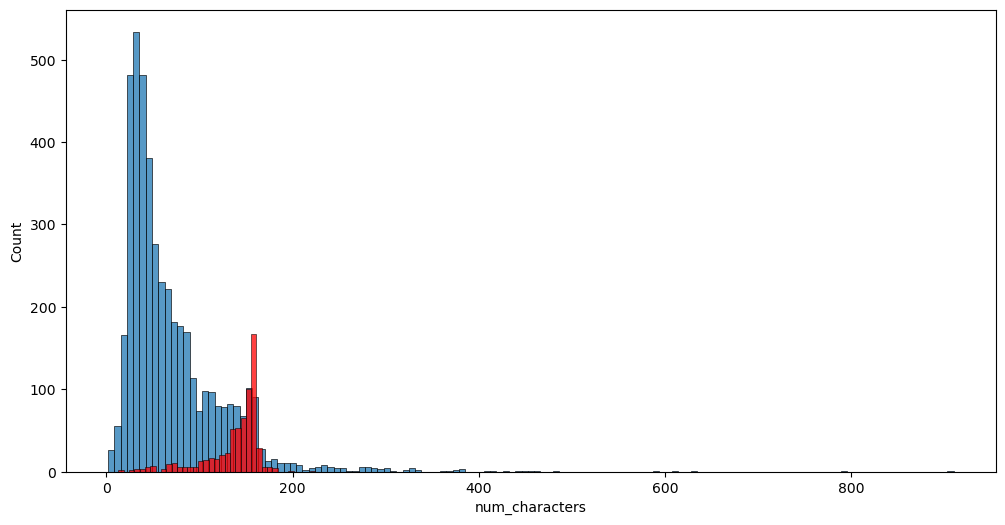

In [64]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

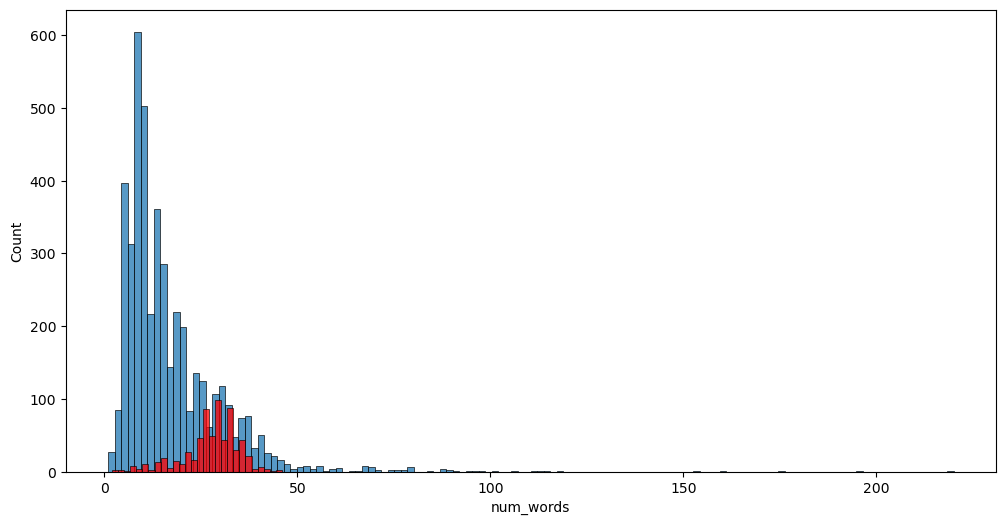

In [65]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

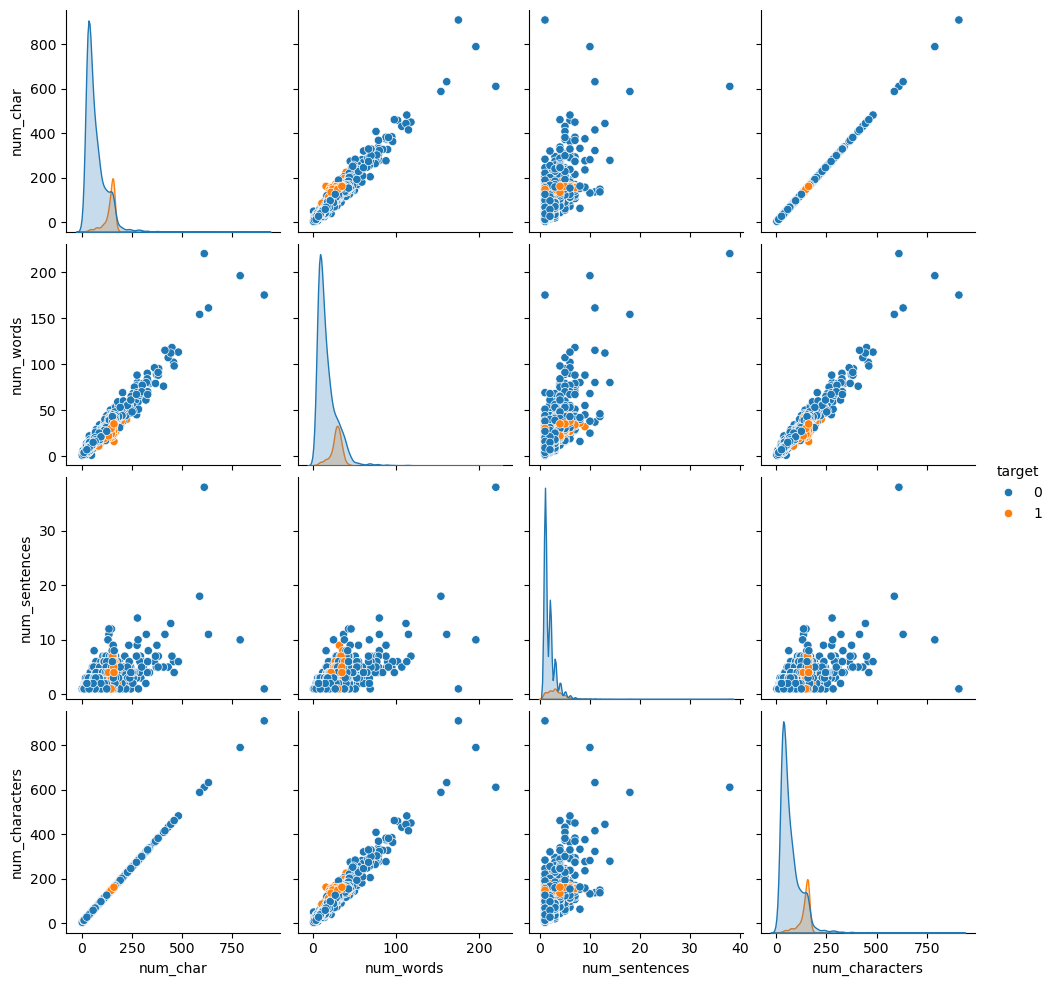

In [66]:
sns.pairplot(df,hue='target')

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [70]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [71]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

NameError: name 'stopwords' is not defined